# Example usage

Here we will demonstrate how to use `lrasm` in a project to check linear regression assumptions:

In [2]:
from lrasm.homoscedasticity_tst import homoscedasticity_test
from lrasm.multicollinearity_tst import multicollinearity_test
from lrasm.normality_tst import normality_test
from sklearn import datasets
import pandas as pd
import matplotlib.pyplot as plt

#print(lrasm.__version__)

### Define Sample Data

We will use the `Iris` dataset from `scikit-learn` to demonstrate the functionality of `lrasm`. 

In [3]:
data = datasets.load_iris()
iris_df = pd.DataFrame(data=data.data, columns=data.feature_names)
iris_df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In our example, we want to investigate the linear relationship between the response `petal width (cm)` versus the predictors: `sepal length (cm)`, `sepal width (cm)`, and `petal width (cm)`. We start by splitting the dataset into a dataframe containing the predictors and a series containing the response:

In [4]:
X = iris_df.drop("sepal width (cm)", axis = 1)
X

,sepal length (cm),petal length (cm),petal width (cm)
0,5.1,1.4,0.2
1,4.9,1.4,0.2
2,4.7,1.3,0.2
3,4.6,1.5,0.2
4,5.0,1.4,0.2
...,...,...,...
145,6.7,5.2,2.3
146,6.3,5.0,1.9
147,6.5,5.2,2.0
148,6.2,5.4,2.3


In [5]:
y = iris_df["petal width (cm)"]
y

0      0.2
1      0.2
2      0.2
3      0.2
4      0.2
      ... 
145    2.3
146    1.9
147    2.0
148    2.3
149    1.8
Name: petal width (cm), Length: 150, dtype: float64

### Test for Homoscedasticity of Residuals

We can evaluate the homoscedasticity of our residuals by passing our predictors and response into the function `homoscedasticity_test()`. Note that `homoscedasticity_test()` returns two objects, the first one is a dataframe containing the correlation coefficient of absolute residuals vs predicted values along with the P value of said correlation, while the second is a plot of residuals vs predicted values.

The correlation coefficient between the absolute residuals and the fitted y values is:  0.861  With a p value of:  0.0
The p value of the correlation is below the rejection threshold, thus the correlation is likely significant.         
The data is unlikely to be homoscedastic.


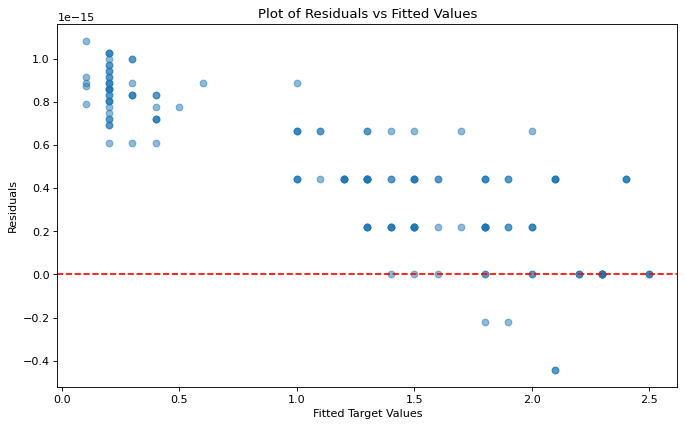

In [6]:
corr_df, plot = homoscedasticity_test(X, y)

In [7]:
corr_df

,correlation_coefficient,p_value
0,0.861,0.0


In the example above, it's clear that the residuals are not independent of the fitted values, thus we would conclude that the linear relationship is not homosecdastic.

### Test for Normality of Residuals

We can evaluate the normality of our residuals by passing our predictors and response into the function `normality_test()`. Note that `normality_test()` returns two objects, the first one is a p-value from the Shapiro Wilk test, while the second is a string containing either the word Pass or Fail depending on the results of the test. The function will also print a summary statement.

In [8]:
p_value, res = normality_test(X, y)

After applying the Shapiro Wilks test for normality of the residuals the regression assumption of normality has failed and you should make some djustments before continuing with your analysis


In [9]:
p_value

3.326205842313357e-05

In [10]:
res

'Fail'

In the example above, it's clear that the residuals are not normaly distributed, and that this assumption has failed.

### Test for multicollinearity

We can evaluate the multicollinearity assumption of our data set by passing the features and the threshold for the VIF value. `multicollinearity_test()` takes these two arguments and returns a data frame with VIF for each feature along with the statement advising the user whether the multicollinearity assumption is violated.  

In [11]:
vif_df = multicollinearity_test(X, VIF_thresh = 10)

3 cases of possible multicollinearity
0 cases of definite multicollinearity
Assumption partially satisfied

Consider removing variables with high Variance Inflation Factors


In [12]:
vif_df

,features,VIF
0,sepal length (cm),15.984946
1,petal length (cm),95.111245
2,petal width (cm),49.204035


As we can see above, all VIFs are greater then the pre-defined threshold. That is why we three possible multicollinearity cases. 